**What are Time Series?**

A time series is a sequence of **data points indexed (or listed or graphed)** in chronological order. The fundamental characteristic that distinguishes a time series from other types of data is the **inherent dependence on time**; the order of the data is crucial for analysis.

Each data point in a time series is associated with a **specific timestamp**, and the analysis aims to understand patterns, trends, seasonality, and other components that vary over time.

![](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2020/07/TimeSeriesTrade.png?fit=576%2C384&ssl=1)

A time series can be represented by the equation:

$Y_t = f(t) + \epsilon_t$

Where:
* $Y_t$ is the value of the time series at time $t$.
* $f(t)$ represents the deterministic component of the time series, which can include trend, seasonality, and cyclical patterns.
* $\epsilon_t$ represents the random or irregular component (noise) at time $t$.

In [1]:
#Import Libs
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [2]:
#Create a Sample DataSet with the First Column
date_rng = pd.date_range(start='2025-01-01', periods=50, freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [3]:
# Generate Random data with trend, seasonality, and randomness
np.random.seed(42)
df['attribute_1'] = np.linspace(10, 20, 50) + np.sin(np.linspace(0, 2 * np.pi, 50) * 5) * 2 + np.random.randn(50)
df['attribute_2'] = np.linspace(50, 60, 50) + np.cos(np.linspace(0, 2 * np.pi, 50) * 3) * 3 + np.random.randn(50) * 0.5
df['attribute_3'] = np.random.randn(50) * 5 + 100

In [4]:
#Show the Dataframe
print(df)

            attribute_1  attribute_2  attribute_3
date                                             
2025-01-01    10.496714    53.162042    92.923146
2025-01-02    11.262038    52.792291    97.896773
2025-01-03    12.973188    52.224750    98.286427
2025-01-04    14.012212    52.132433    95.988614
2025-01-05    11.673243    51.427981    99.193571
2025-01-06    10.658131    50.449953   102.020254
2025-01-07    11.507246    48.787978   109.430930
2025-01-08    10.246150    48.571059   100.872889
2025-01-09     9.334353    48.804449   101.287752
2025-01-10    11.397860    49.477340    99.627770
2025-01-11    11.833153    49.516891    90.406144
2025-01-12    13.170533    50.764454    99.867431
2025-01-13    14.665305    51.607743   100.301151
2025-01-14    12.512980    52.908541   112.316211
2025-01-15    11.999993    55.133875    99.038195
2025-01-16    12.116620    56.353301   101.507737
2025-01-17    10.771919    56.204671    99.826441
2025-01-18    11.792877    56.873039    94.156610


In [5]:
#Show the First Lines and the Last Lines
display(df.head())
display(df.tail())

,attribute_1,attribute_2,attribute_3
date,,,
2025-01-01,10.496714,53.162042,92.923146
2025-01-02,11.262038,52.792291,97.896773
2025-01-03,12.973188,52.224750,98.286427
2025-01-04,14.012212,52.132433,95.988614
2025-01-05,11.673243,51.427981,99.193571


,attribute_1,attribute_2,attribute_3
date,,,
2025-02-15,17.372759,58.548071,103.909114
2025-02-16,17.050179,60.750165,93.815246
2025-02-17,18.731623,61.877412,93.397717
2025-02-18,18.943316,62.579225,102.609708
2025-02-19,18.236960,62.882706,101.484923


In [6]:
#Show the Info of the Dataframe
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2025-01-01 to 2025-02-19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   attribute_1  50 non-null     float64
 1   attribute_2  50 non-null     float64
 2   attribute_3  50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


None

In [7]:
#Show the Statics about Dataframe
display(df.describe())

,attribute_1,attribute_2,attribute_3
count,50.000000,50.000000,50.000000
mean,14.774526,55.068890,99.803562
std,3.117979,3.682935,5.077068
min,9.334353,48.571059,90.406144
25%,11.874863,52.615119,95.586950
50%,14.787390,55.249256,100.084291
75%,17.318954,57.532675,102.549271
max,20.405636,62.882706,112.316211


**Visualize Dataframe and the Temporal Series**

This section focuses on visualizing the time series data to gain insights into its patterns, trends, and characteristics. We will generate several plots to explore the different attributes over time and their relationships.

In [8]:
#Import Graphics Libs
import matplotlib.pyplot as plt
import seaborn as sns

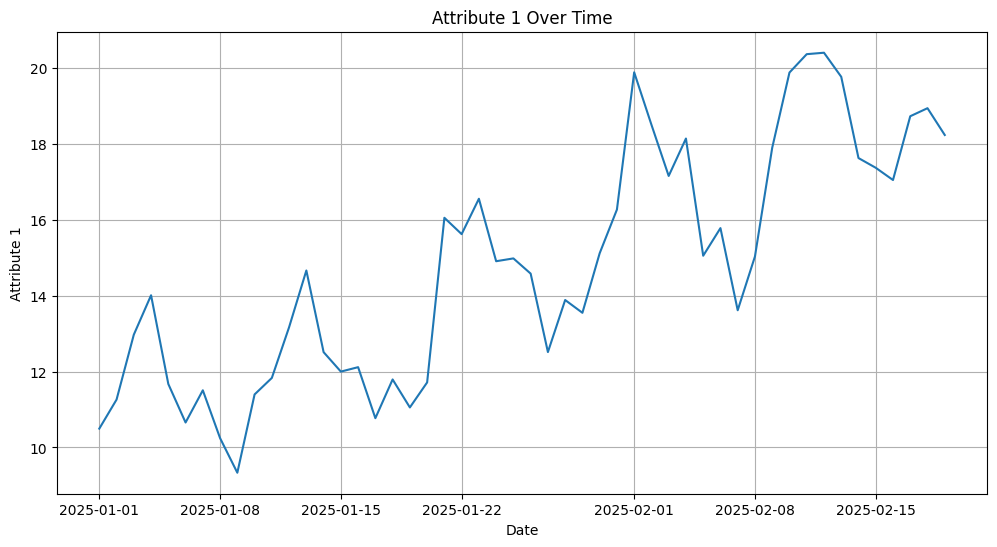

In [9]:
#Example 01
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='attribute_1')
plt.title('Attribute 1 Over Time')
plt.xlabel('Date')
plt.ylabel('Attribute 1')
plt.grid(True)
plt.show()

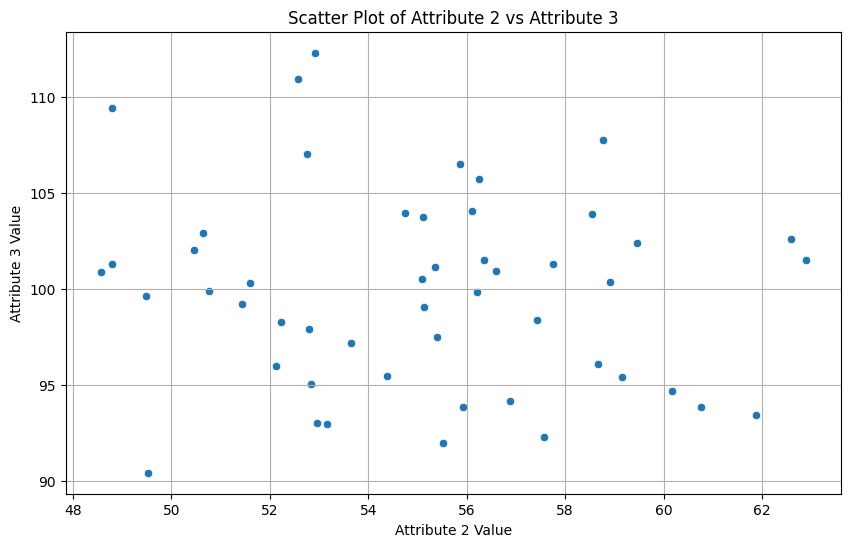

In [10]:
#Example 02
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='attribute_2', y='attribute_3')
plt.title('Scatter Plot of Attribute 2 vs Attribute 3')
plt.xlabel('Attribute 2 Value')
plt.ylabel('Attribute 3 Value')
plt.grid(True)
plt.show()

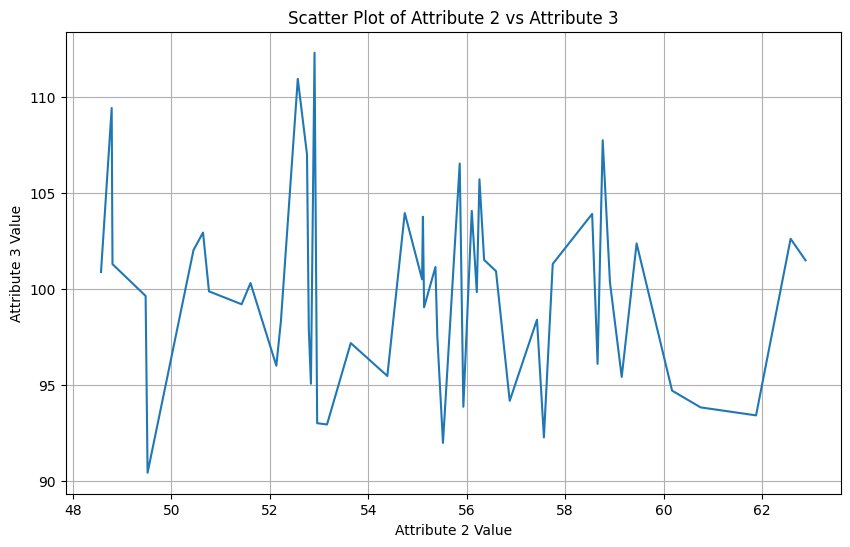

In [11]:
#Example 03
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='attribute_2', y='attribute_3')
plt.title('Scatter Plot of Attribute 2 vs Attribute 3')
plt.xlabel('Attribute 2 Value')
plt.ylabel('Attribute 3 Value')
plt.grid(True)
plt.show()

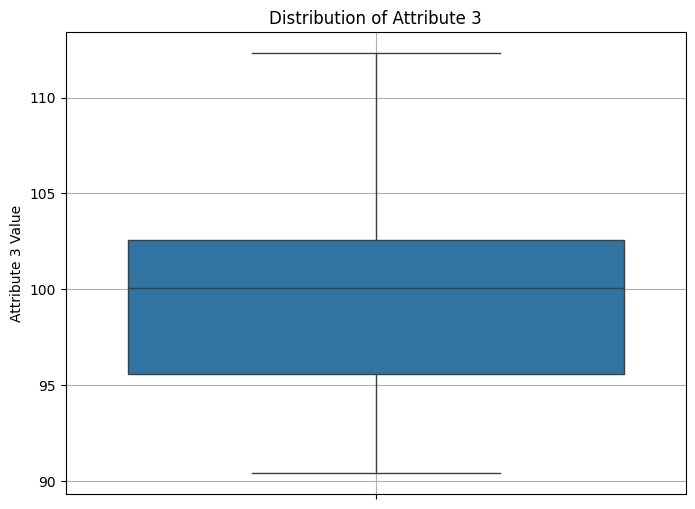

In [12]:
#Example 04
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='attribute_3')
plt.title('Distribution of Attribute 3')
plt.ylabel('Attribute 3 Value')
plt.grid(True)
plt.show()

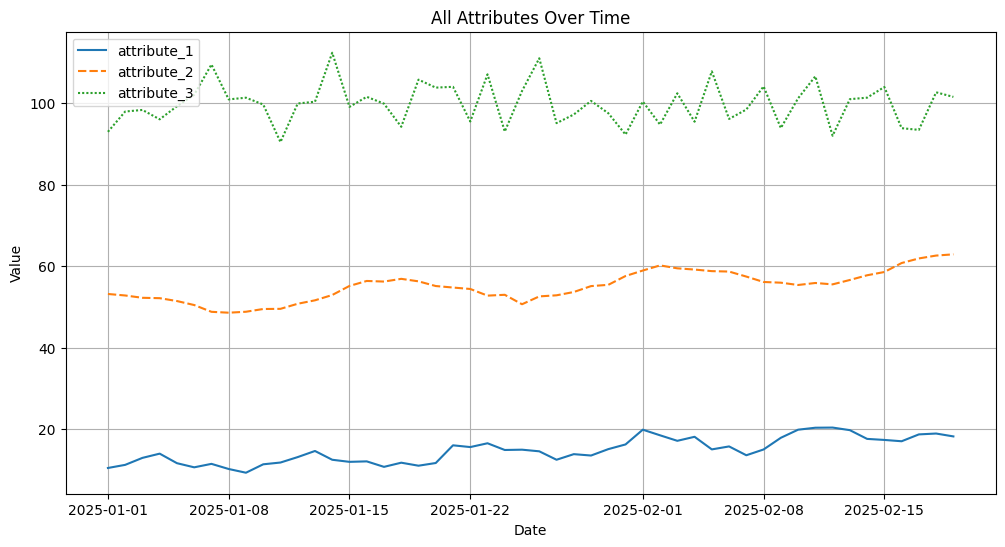

In [13]:
#Exemplo 05
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.title('All Attributes Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## **Linear Regression for Time Series**

Linear regression is a statistical method used to model the relationship between a dependent variable (the time series you want to predict) and one or more independent variables (often time itself or other relevant factors). In the context of time series, linear regression can be used to identify and model the linear trend component.

The basic equation for simple linear regression is:

$Y_t = \beta_0 + \beta_1 t + \epsilon_t$

Where:
* $Y_t$ is the value of the time series at time $t$.
* $\beta_0$ is the intercept (the value of $Y_t$ when $t=0$).
* $\beta_1$ is the coefficient or slope (the change in $Y_t$ for a one-unit increase in $t$).
* $t$ is the time index.
* $\epsilon_t$ is the error term, representing the part of $Y_t$ not explained by the linear relationship with $t$.

In [14]:
# Example of Regression ( The index needs to be converted to a numerical format )
df['time_index'] = (df.index - df.index[0]).days

In [15]:
#Reshape after the conversion of Index
X = df['time_index'].values.reshape(-1, 1)
y = df['attribute_3']

In [16]:
#Apply the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
#Show the Results
print("\nLinear Regression of attribute_3 against time:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")


Linear Regression of attribute_3 against time:
Intercept: 100.10727134661701
Coefficient (slope): -0.012396293059759911
